In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

EDA 1:-

In [122]:
df=pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [9]:
#Q.No.1What is the range of selling prices in the dataset.
maxSellingPrice=np.max(df['selling_price'])
minSellingPrice=np.min(df['selling_price'])
range=maxSellingPrice-minSellingPrice

print(f'Range of selling Price is {range}')


Range of selling Price is 755000


In [10]:
#Q.No.2> What is the median selling price for bikes in the dataset?
print(f'median of selling price is {np.median(df['selling_price'])}')

median of selling price is 45000.0


In [12]:
#Q.No.3> What is the most common seller type?
import statistics
print(f'The most common seller type is {statistics.mode(df['seller_type'])}')


The most common seller type is Individual


In [15]:
#Q.No.4> How many bikes have driven more than 50,000 kilometers?
df.describe()
count=0
for i in df['km_driven']:
    if i>50000:
        count+=1

print(f'There are {count} bikes have driven more than 50,000 kilometers')


There are 170 bikes have driven more than 50,000 kilometers


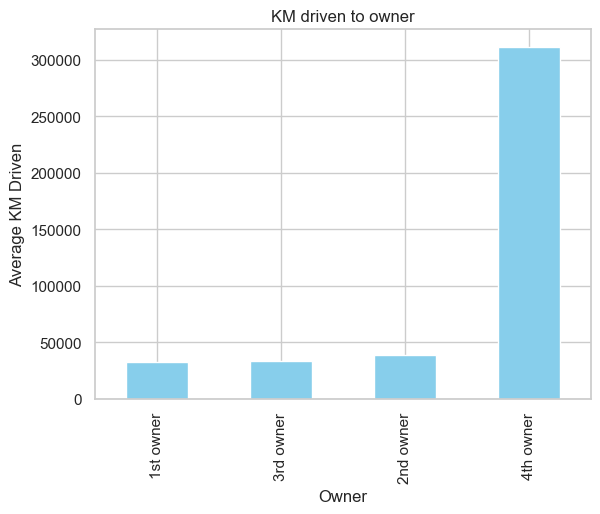

In [125]:
#Q.No.5> What is the average km_driven value for each ownership type?
price_variation = df.groupby('owner')['km_driven'].mean()

import matplotlib.pyplot as plt

# Plot the price variation
price_variation.sort_values().plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('KM driven to owner')
plt.xlabel('Owner')
plt.ylabel('Average KM Driven')
plt.xticks(rotation=90)
plt.show()


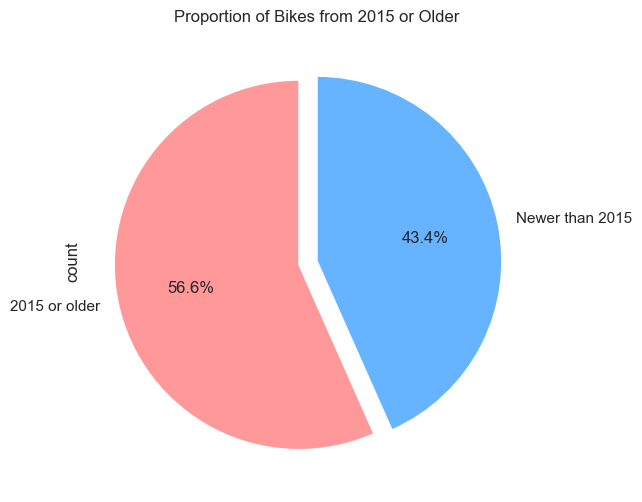

In [127]:
#Q.No.6> What proportion of bikes are from the year 2015 or older?
# Create a new column 'Category' to classify bikes
df['Category'] = df['year'].apply(lambda x: '2015 or older' if x <= 2015 else 'Newer than 2015')


# Count the number of bikes in each category
category_counts = df['Category'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
category_counts.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, explode=(0.1, 0))

# Add title
plt.title('Proportion of Bikes from 2015 or Older')

# Show the plot
plt.show()







In [ ]:
#Q.No.7> What is the trend of missing values across the dataset?
df.isnull().sum()

#Only ex_showroom_price feature have 435 missing value


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [ ]:
#Q.No.8> What is the highest ex_showroom_price recorded, and for which bike?
max=np.max(df['ex_showroom_price'])
index=-1
count=0
for i in df['ex_showroom_price']:
    if max==i:
        break
    count+=1
print(df['name'][count])

Harley-Davidson Street Bob


In [ ]:
#Q.No.9> What is the total number of bikes listed by each seller type?
df['seller_type'].value_counts()



seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

<Axes: xlabel='selling_price', ylabel='km_driven'>

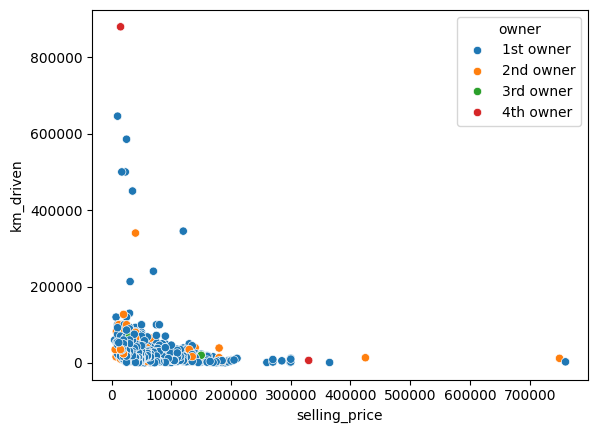

In [37]:
#Q.No.10> What is the relationship between selling_price and km_driven for first-owner bikes?
sns.scatterplot(x='selling_price',y='km_driven',data=df,hue='owner')


In [ ]:
#Q.No.11> Identify and remove outliers in the km_driven column using the IQR method?
df['km_driven'].isna().sum()

#outlier is not present these feature


0

C:\Users\hp\AppData\Local\Temp\ipykernel_26920\2782985957.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='year',y='selling_price',data=df,palette='coolwarm')


<Axes: xlabel='year', ylabel='selling_price'>

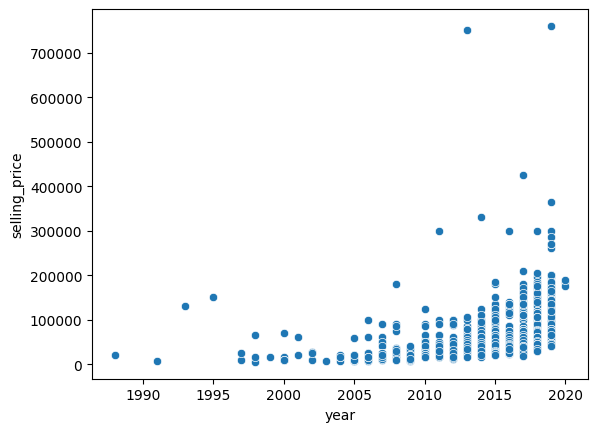

In [40]:
#Q.No.12> Perform a bivariate analysis to visualize the relationship between year and selling_price?
sns.scatterplot(x='year',y='selling_price',data=df,palette='coolwarm')


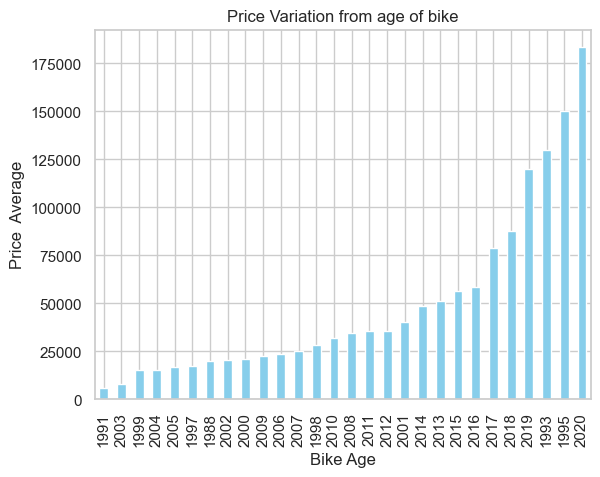

In [126]:
#Q.No.13> What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
price_variation = df.groupby('year')['selling_price'].mean()

import matplotlib.pyplot as plt

# Plot the price variation
price_variation.sort_values().plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Price Variation from age of bike')
plt.xlabel('Bike Age')
plt.ylabel('Price  Average')
plt.xticks(rotation=90)
plt.show()

In [131]:
#Q.No.14> Which bike names are priced significantly above the average price for their manufacturing year?
df.head()

# Calculate the average price for each year
average_price_per_year = df.groupby('year')['selling_price'].mean().reset_index()

# Merge the average price back to the original dataframe
df = df.merge(average_price_per_year, on='year')

# Define the threshold as 20% above the average price for the year
threshold = 0.2

# Identify bikes priced significantly above the average
df['Above Average'] = df['selling_price'] > (df['average_price_per_year'] * (1 + threshold))

# Filter bikes that are priced significantly above the average
above_average_bikes = df[df['Above Average']]

# Plot the bikes that are above average
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='selling_price', data=above_average_bikes, palette='Blues_d')

# Add titles and labels
plt.title('Bikes Priced Significantly Above the Average for Their Manufacturing Year')
plt.xlabel('Bike Model')
plt.ylabel('Price')

# Show the plot
plt.xticks(rotation=45)
plt.show()





KeyError: 'selling_price'

<Axes: >

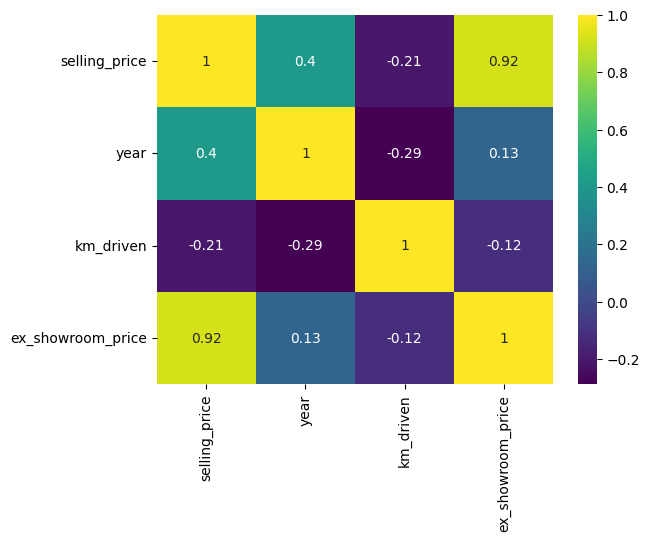

In [43]:
#Q.no.15>  Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_cols=df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(),cmap='viridis',annot=True)

EDA 2:-

In [5]:
df2=pd.read_csv("Car Sale.csv")
df2.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


C:\Users\hp\AppData\Local\Temp\ipykernel_18940\351805118.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Dealer_Name', y='Price ($)', data=average_prices, palette='viridis')


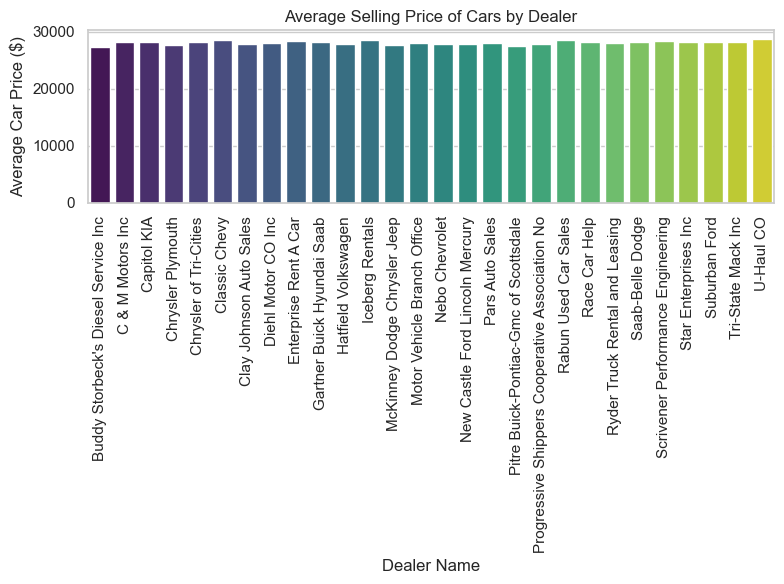

In [7]:
#Q.No.1> What is the average selling price of cars for each dealer, and how does it compare across different dealers?


# Calculate the average car price for each dealer
average_prices = df2.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

# Set up the seaborn style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Dealer_Name', y='Price ($)', data=average_prices, palette='viridis')

# Add labels and title
ax.set_xlabel('Dealer Name')
ax.set_ylabel('Average Car Price ($)')
ax.set_title('Average Selling Price of Cars by Dealer')

# Show the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



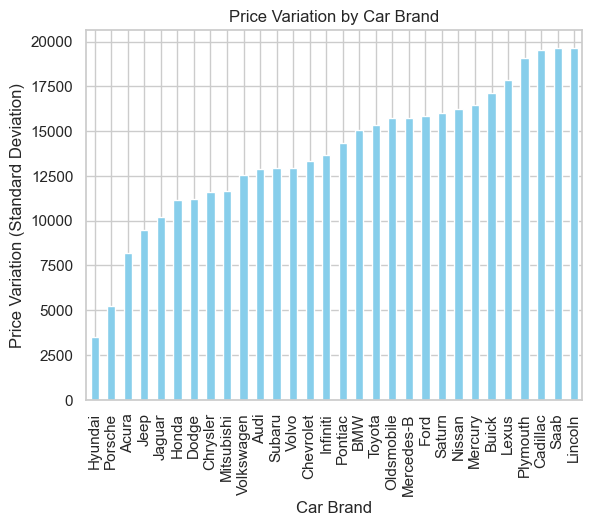

In [10]:
#Q.No.2> Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
# Calculate the standard deviation of prices for each brand
price_variation = df2.groupby('Company')['Price ($)'].std()

import matplotlib.pyplot as plt

# Plot the price variation
price_variation.sort_values().plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Price Variation by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=90)
plt.show()



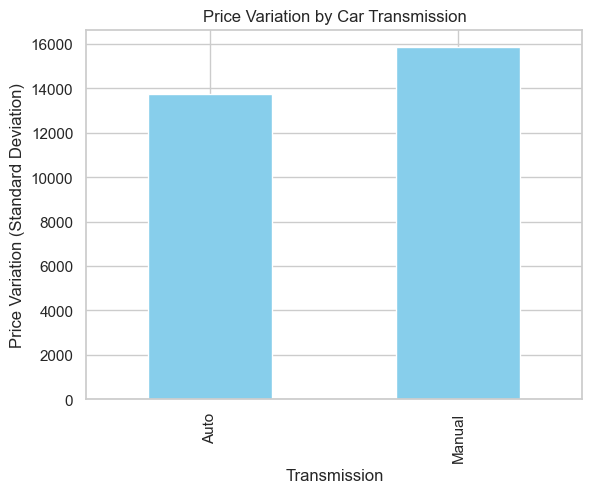

In [14]:
#Q.No.3> What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

price_variation = df2.groupby('Transmission')['Price ($)'].std()

import matplotlib.pyplot as plt

# Plot the price variation
price_variation.sort_values().plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Price Variation by Car Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=90)
plt.show()

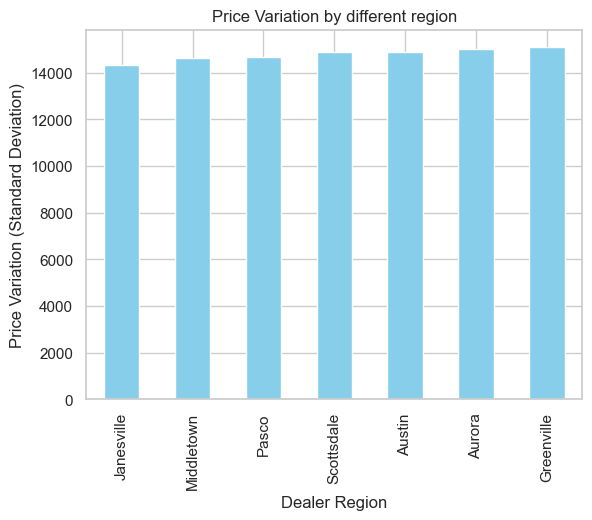

In [13]:
#Q.No.4> What is the distribution of car prices across different regions?

price_variation = df2.groupby('Dealer_Region')['Price ($)'].std()

import matplotlib.pyplot as plt

# Plot the price variation
price_variation.sort_values().plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Price Variation by different region')
plt.xlabel('Dealer Region')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=90)
plt.show()




C:\Users\hp\AppData\Local\Temp\ipykernel_18940\2585668138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='muted')


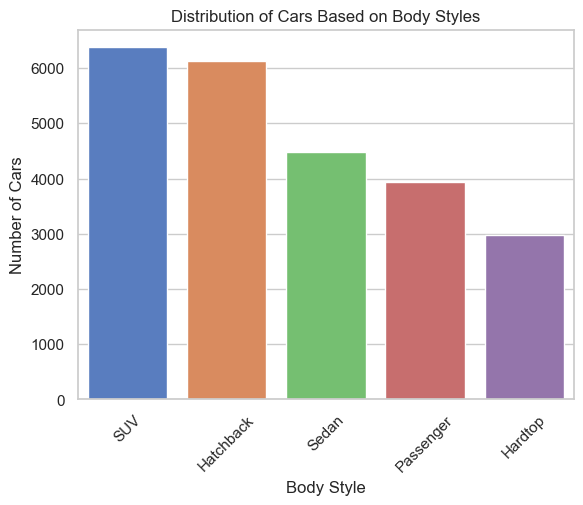

In [17]:
#Q.No.5> What is the distribution of cars based on body styles?
body_style_counts = df2['Body Style'].value_counts()

# Create a bar plot to show the distribution
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='muted')

# Add titles and labels
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


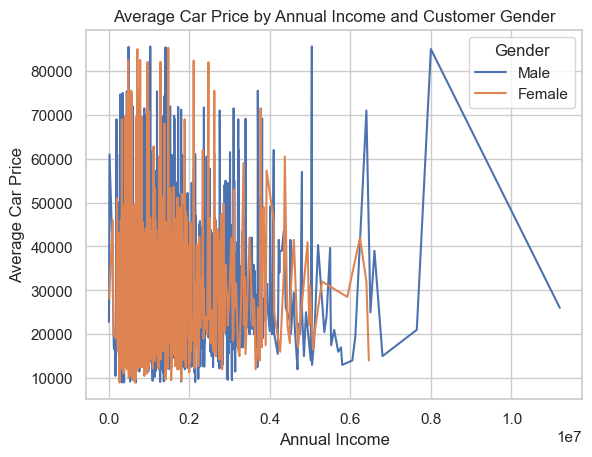

In [23]:
#Q.No.6> How does the average selling price of cars vary by customer gender and annual income.

# Calculate the average car price by gender and annual income
avg_price_by_income_gender = df2.groupby(['Annual Income', 'Gender'])['Price ($)'].mean().reset_index()

# Line plot to show the trend
sns.lineplot(data=avg_price_by_income_gender, x='Annual Income', y='Price ($)', hue='Gender')

# Add titles and labels
plt.title('Average Car Price by Annual Income and Customer Gender')
plt.xlabel('Annual Income')
plt.ylabel('Average Car Price')

# Show the plot
plt.show()


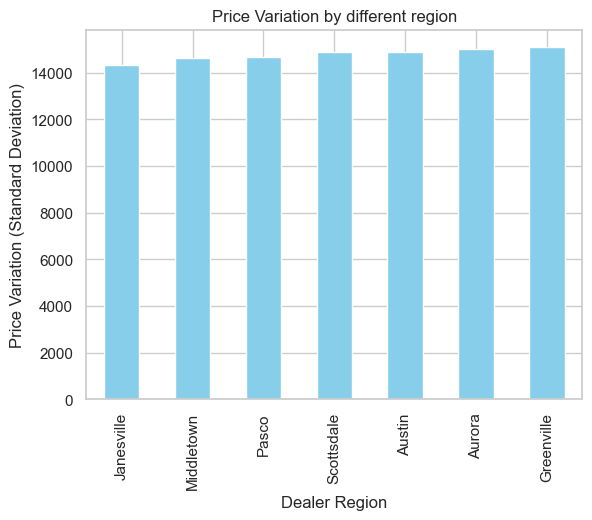

C:\Users\hp\AppData\Local\Temp\ipykernel_18940\530152004.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='muted')


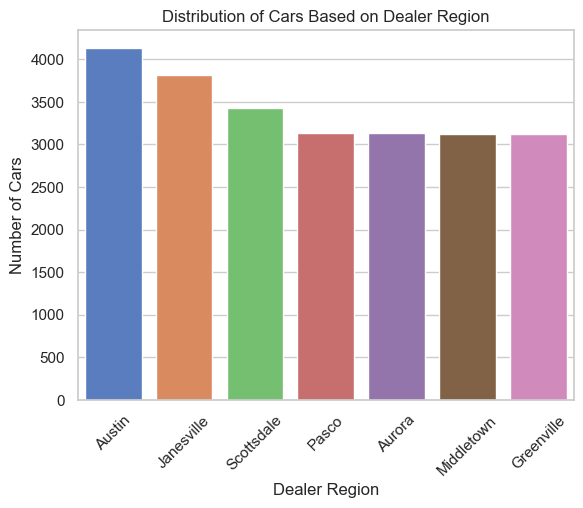

In [21]:
#Q.No.7> What is the distribution of car prices by region, and how does the number of cars sold vary by region?

price_variation = df2.groupby('Dealer_Region')['Price ($)'].std()

import matplotlib.pyplot as plt

# Plot the price variation
price_variation.sort_values().plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Price Variation by different region')
plt.xlabel('Dealer Region')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=90)
plt.show()

body_style_counts = df2['Dealer_Region'].value_counts()

# Create a bar plot to show the distribution
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='muted')

# Add titles and labels
plt.title('Distribution of Cars Based on Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()



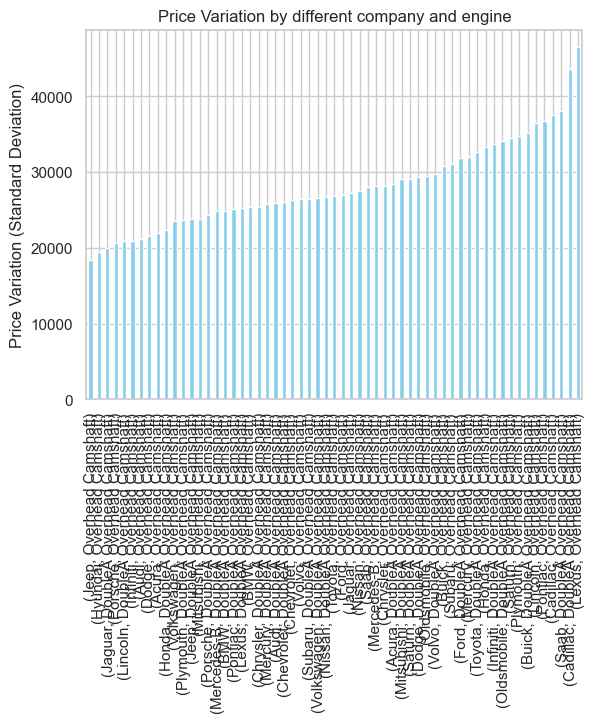

In [27]:
#Q.No.8>  How does the average car price differ between cars with different engine sizes?

price_variation = df2.groupby(['Company','Engine'])['Price ($)'].mean()

import matplotlib.pyplot as plt

# Plot the price variation
price_variation.sort_values().plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Price Variation by different company and engine')
plt.xlabel('')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=90)
plt.show()






C:\Users\hp\AppData\Local\Temp\ipykernel_18940\3535831526.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income Bracket', y='Price ($)', data=df2, palette='Set2')


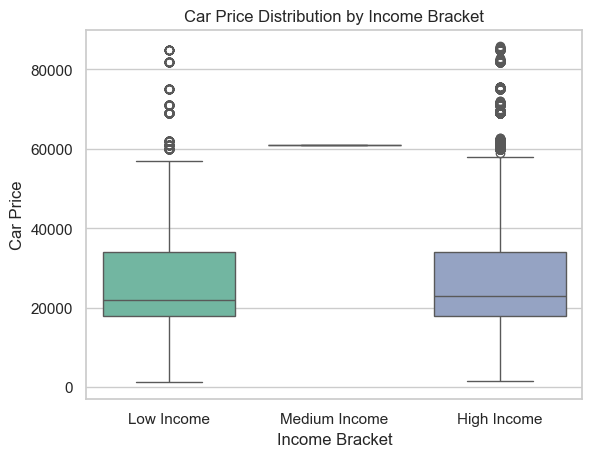

In [30]:
#Q.No.9> How do car prices vary based on the customer’s annual income bracket?


bins = [0, 23000, 34000, float('inf')]
labels = ['Low Income', 'Medium Income', 'High Income']

# Create a new column for income bracket
df2['Income Bracket'] = pd.cut(df2['Annual Income'], bins=bins, labels=labels)

# Create a boxplot to show the distribution of car prices by income bracket
sns.boxplot(x='Income Bracket', y='Price ($)', data=df2, palette='Set2')

# Add titles and labels
plt.title('Car Price Distribution by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Car Price')

# Show the plot
plt.show()


In [ ]:
#Q.No.10> What are the top 5 car models with the highest number of sales, and how does their price distribution look?


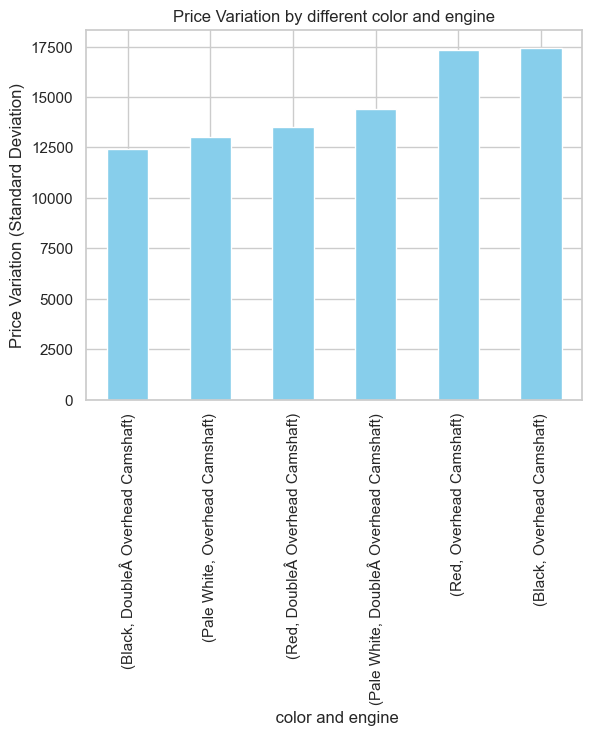

In [33]:
#Q.No.11> How does car price vary with engine size across different car colors, and which colors have the highest price variation?
price_variation = df2.groupby(['Color','Engine'])['Price ($)'].std()

import matplotlib.pyplot as plt

# Plot the price variation
price_variation.sort_values().plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Price Variation by different color and engine')
plt.xlabel(' color and engine')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=90)
plt.show()

#Black color has the highest price variation.

In [ ]:
#Q.No.12> Is there any seasonal trend in car sales based on the date of sale?



Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket'],
      dtype='object')

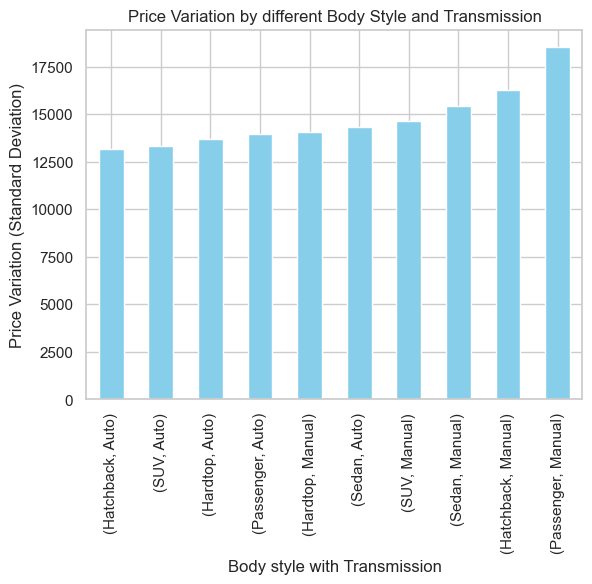

In [34]:
#Q.No.13>  How does the car price distribution change when considering different combinations of body style and transmission type?
price_variation = df2.groupby(['Body Style','Transmission'])['Price ($)'].std()

import matplotlib.pyplot as plt

# Plot the price variation
price_variation.sort_values().plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Price Variation by different Body Style and Transmission')
plt.xlabel('Body style with Transmission')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=90)
plt.show()

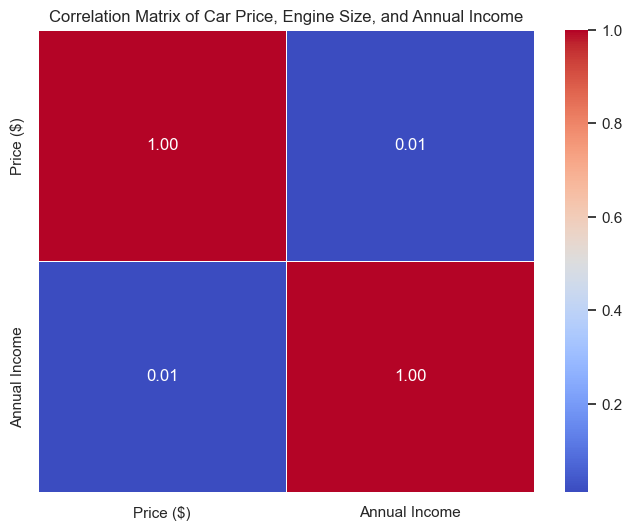

In [45]:
#Q.No.14> What is the correlation between car price, engine size, and annual income of customers, and how do these features interact? 
df2.columns

# Calculate the correlation matrix
correlation_matrix = df2[[ 'Price ($)', 'Annual Income']].corr()



# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)

# Add a title
plt.title('Correlation Matrix of Car Price, Engine Size, and Annual Income')

# Show the plot
plt.show()




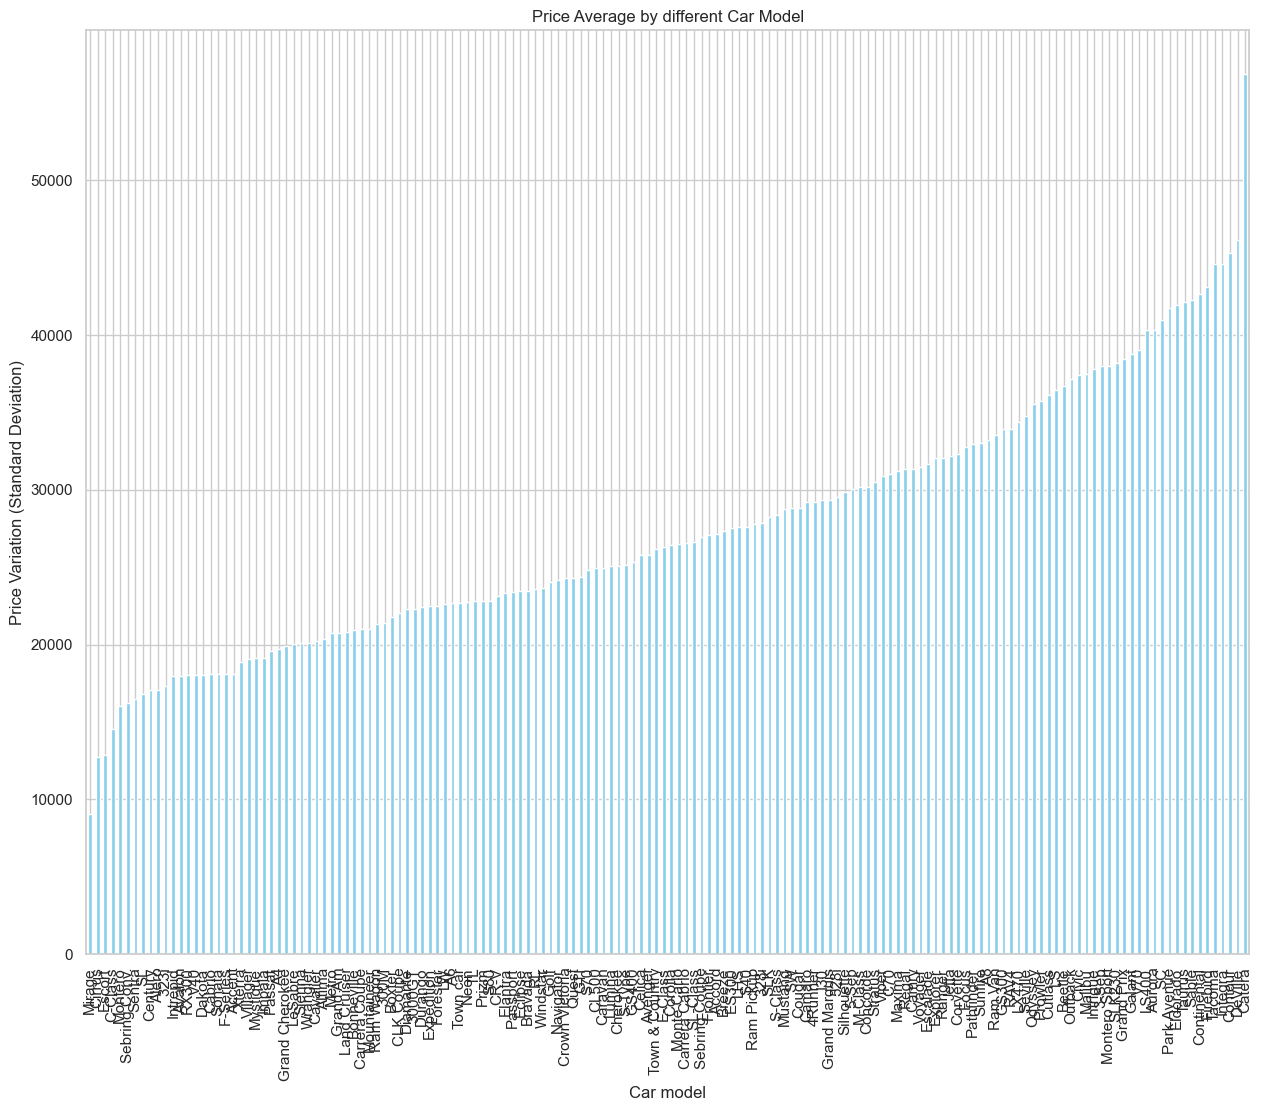

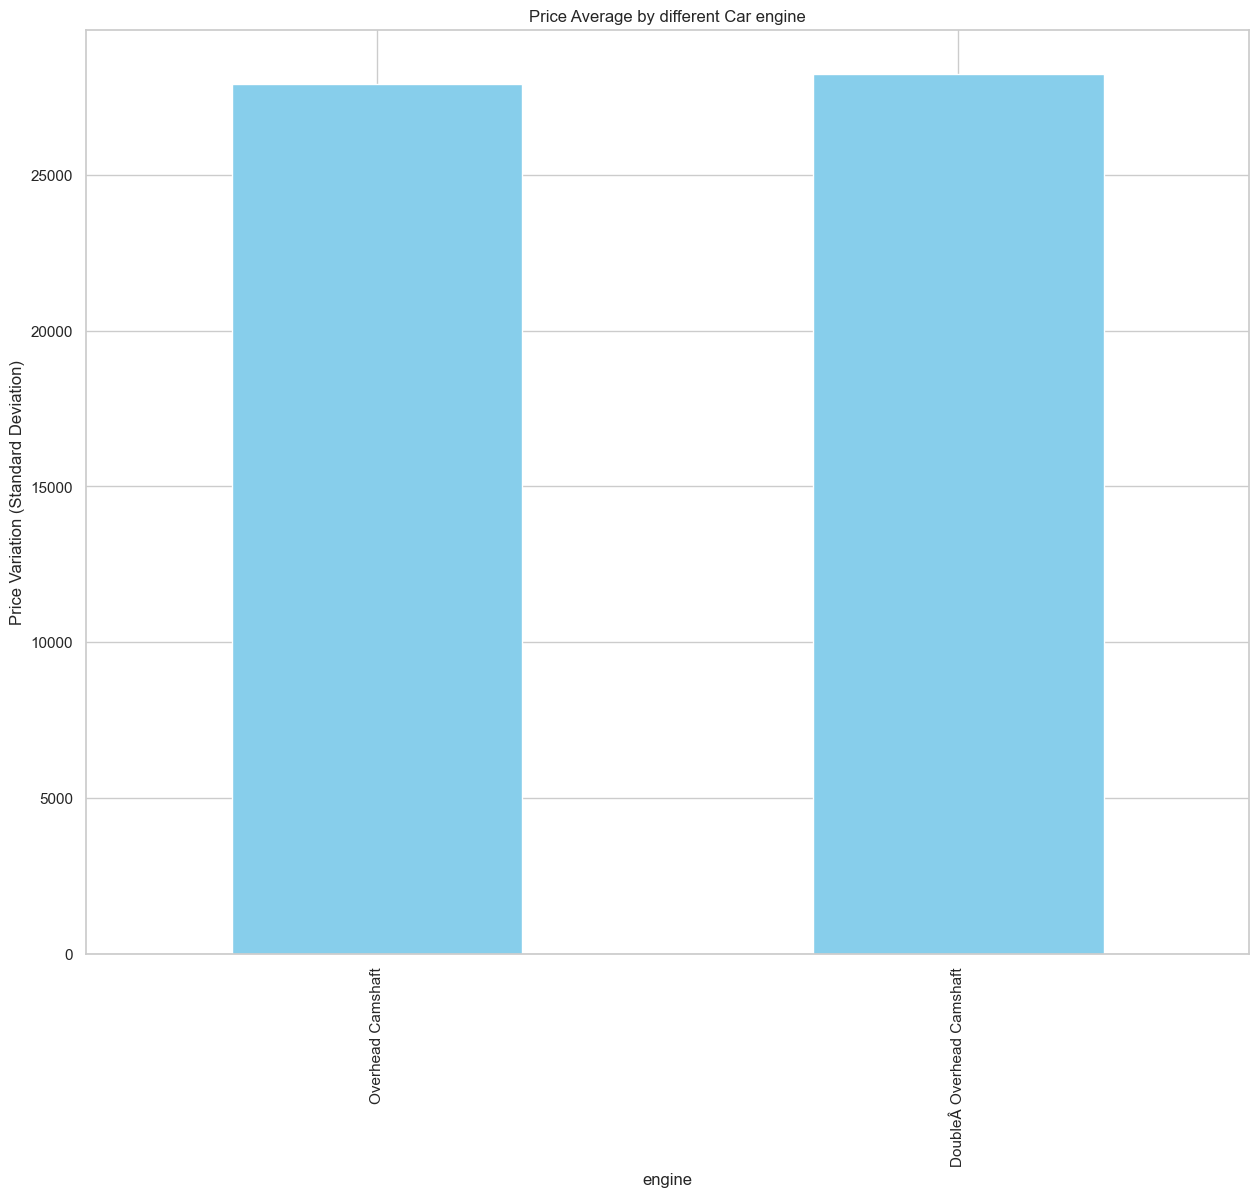

In [50]:
#Q.No.15> How does the average car price vary across different car models and engine types?
price_variation = df2.groupby(['Model'])['Price ($)'].mean()

plt.figure(figsize=(15,12))
# Plot the price variation
price_variation.sort_values().plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Price Average by different Car Model')
plt.xlabel('Car model')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=90)
plt.show()

price_variation = df2.groupby(['Engine'])['Price ($)'].mean()

plt.figure(figsize=(15,12))
# Plot the price variation
price_variation.sort_values().plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Price Average by different Car engine')
plt.xlabel('engine')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks(rotation=90)
plt.show()


EDA 3:-

In [15]:
df=pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [16]:
df.shape

(1465, 16)

In [17]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [18]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [21]:
df.drop(df[['product_id', 'product_name', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']],axis=1,inplace=True)

In [22]:
df.head()

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269"
1,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994"
2,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928"
3,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363"
4,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905"


In [23]:
df['actual_price']=df['actual_price'].str.replace(",","").str.replace("₹","")

In [25]:
df['discounted_price']=df['discounted_price'].str.replace(",","").str.replace("₹","")
df['rating_count']=df['rating_count'].str.replace(",","")
df['discount_percentage']=df['discount_percentage'].str.replace("%","")

In [27]:
df['actual_price']=df['actual_price'].astype(float)
df['discount_percentage']=df['discount_percentage'].astype(float)
df['discounted_price']=df['discounted_price'].astype(float)

In [29]:
df['rating']=df['rating_count'].astype(float)
df['rating_count']=df['rating_count'].astype(int)

In [30]:
df.dtypes

category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count             int32
dtype: object

In [40]:
numeric_cols=[ 'discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count']

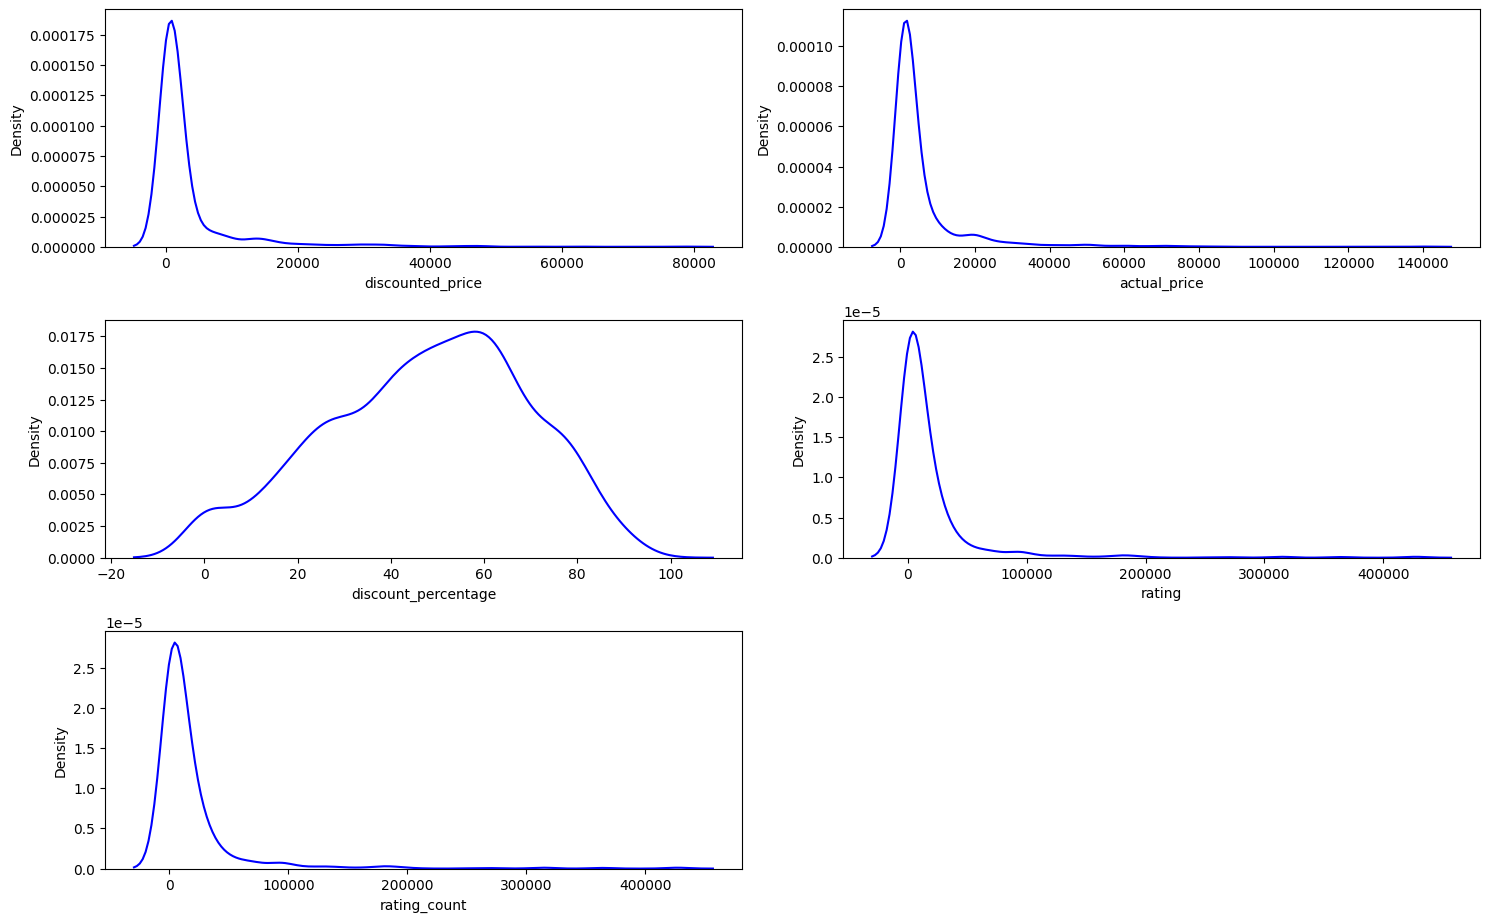

In [41]:
#Univariate Analysis
plt.figure(figsize=(15,12))
for i in range(0,len(numeric_cols)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(x=df[numeric_cols[i]],color='blue')
    plt.xlabel(numeric_cols[i])
    plt.tight_layout()

<Axes: >

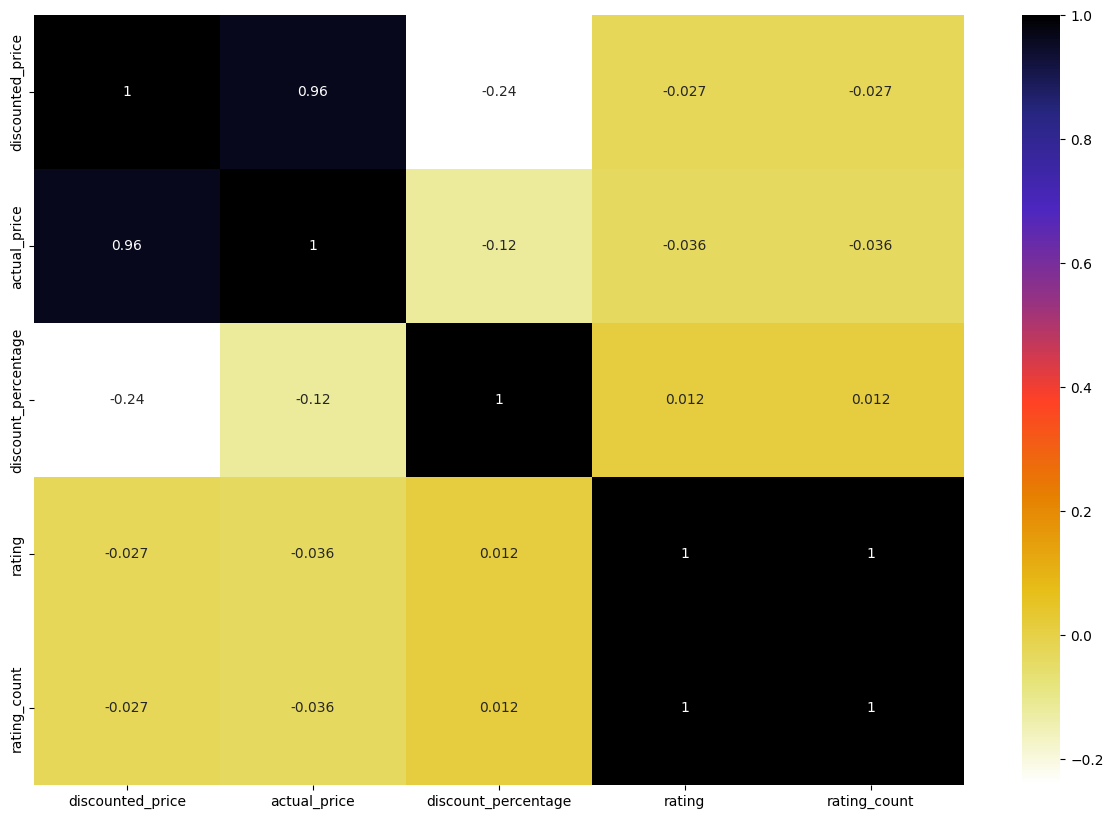

In [42]:
plt.figure(figsize=(15,10))
numeric_df = df.select_dtypes(include=[np.number]) 
sns.heatmap(numeric_df.corr(),cmap='CMRmap_r',annot=True)

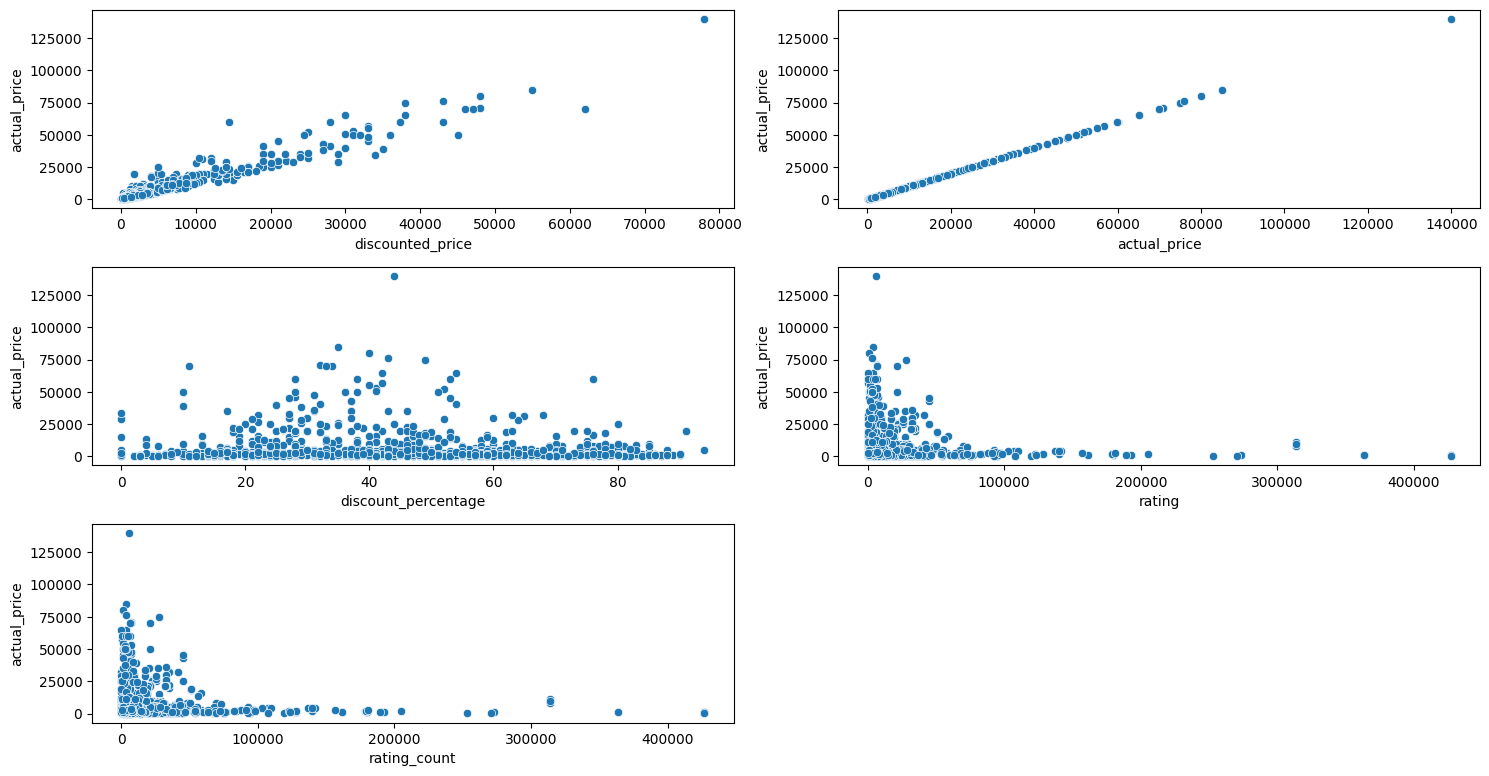

In [43]:
#Bovariate Analysis
plt.figure(figsize=(15,10))
for i in range(0,len(numeric_cols)):
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=numeric_cols[i],y=df['actual_price'],data=df)
    plt.xlabel(numeric_cols[i])
    plt.tight_layout()

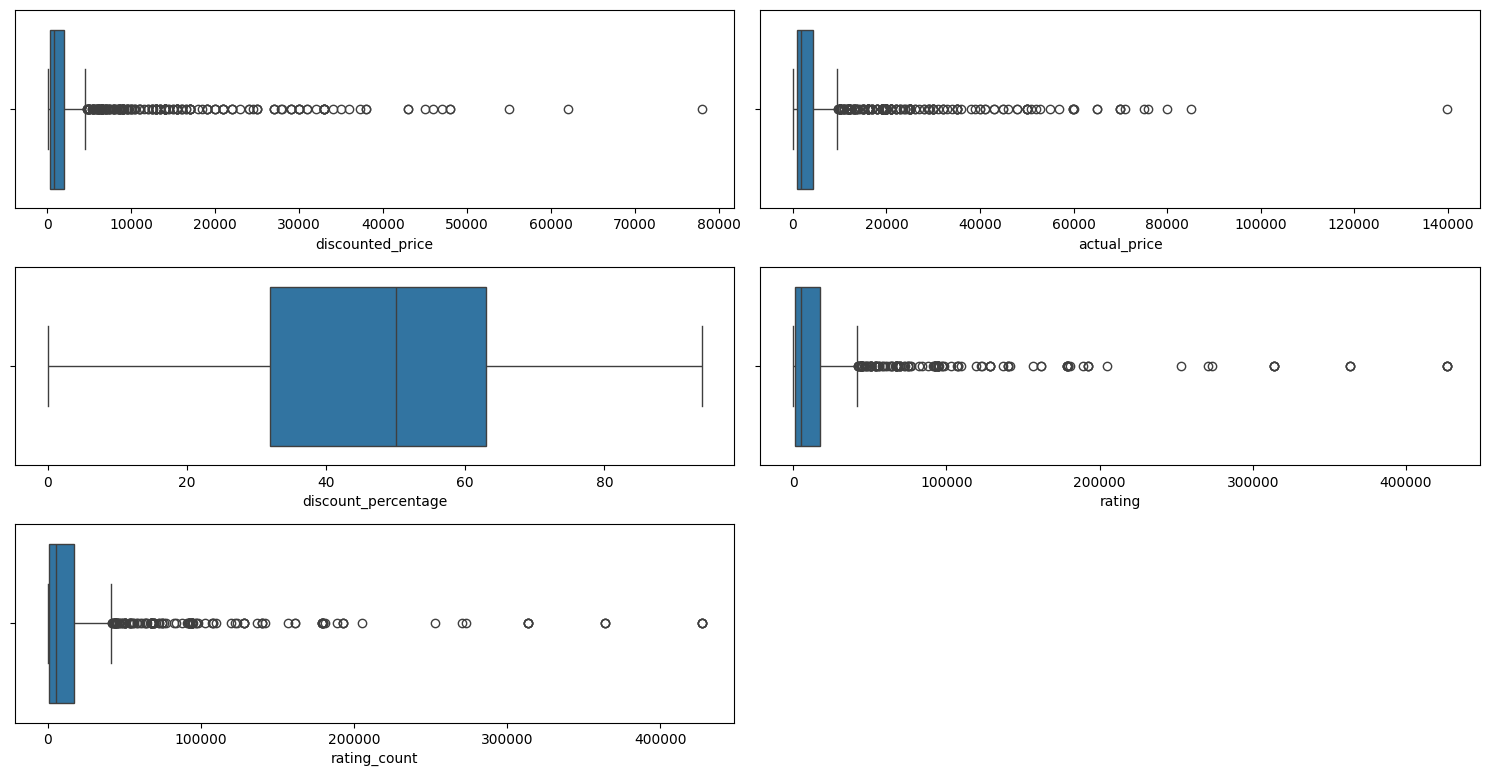

In [44]:
#Bovariate Analysis
plt.figure(figsize=(15,10))
for i in range(0,len(numeric_cols)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=numeric_cols[i],data=df)
    plt.xlabel(numeric_cols[i])
    plt.tight_layout()

Insights Oulier is present all numeric feature except discount percentage

EDA 4:-

In [83]:
df4=pd.read_csv('spotify.csv')
df4

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [88]:
#Q.No.1> Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?
print(df4.isnull().sum())
#Hence Null value is not present 
print(df4.duplicated().sum())
#Hence duplicate vakue is present and is not useful then drop it.
df4.drop_duplicates()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
27


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


<Axes: xlabel='Popularity', ylabel='Count'>

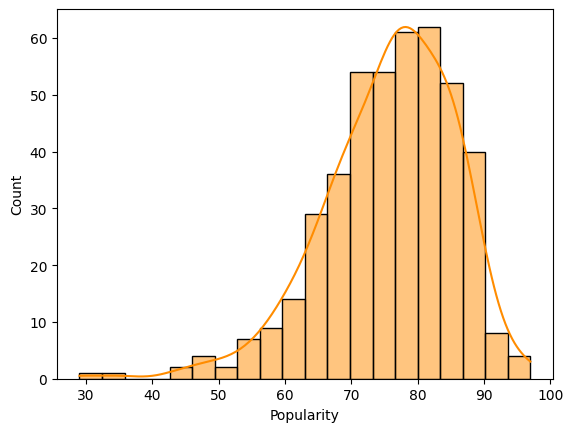

In [89]:
#Q.No.2>  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
sns.histplot(df4['Popularity'],bins=20,kde=True,color='darkorange')

<Axes: xlabel='Popularity', ylabel='Duration (ms)'>

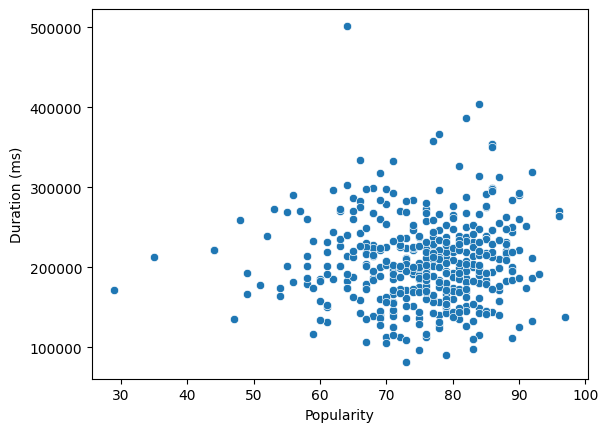

In [91]:
#Q.No.3> Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
sns.scatterplot(x='Popularity',y='Duration (ms)',data=df4)

In [ ]:
#Q.No.4> Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?
df4['Artist'].value_counts()

#Drake artist has the highest number of tracks in the dataset.

Artist
Drake             20
Travis Scott      12
21 Savage         11
¥$                11
Lil Nas X         11
                  ..
Arizona Zervas     1
Fivio Foreign      1
Pressa             1
David Guetta       1
Diddy              1
Name: count, Length: 115, dtype: int64

In [97]:
#Q.No.5> What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
print(" 5 least popular track :- ")
df4['Popularity'].tail(4)
print('Artsit name')
print(df4['Artist'].tail(4))

 5 least popular track :- 
Artsit name
436      Fat Joe
437    A$AP Ferg
438        Diddy
439    Rick Ross
Name: Artist, dtype: object


In [98]:
#Q.No.6>  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?


In [99]:
#Q.No.7> For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?


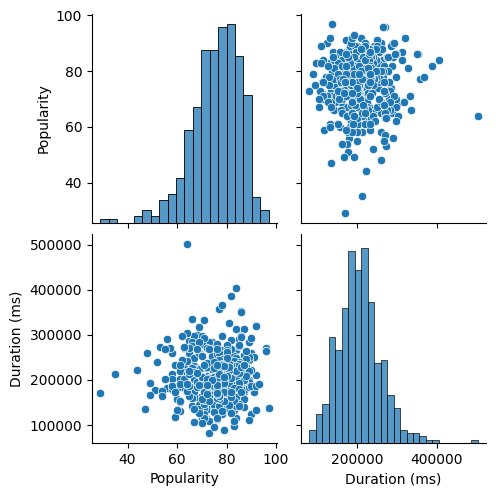

In [104]:
#Q.No.8> Visualize relationships between multiple numerical variables simultaneously using a pair plot?
sns.pairplot(df4)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114],
 [Text(0, 0, 'Drake'),
  Text(1, 0, 'Travis Scott'),
  Text(2, 0, 'Post Malone'),
  Text(3, 0, 'Noah Kahan'),
  Text(4, 0, 'Nicki Minaj'),
  Text(5, 0, 'Justin Bieber'),
  Text(6, 0, 'Jessie J'),
  Text(7, 0, 'KAROL G'),
  Text(8, 0, '21 Savage'),
  Text(9, 0, 'Metro Boomin'),
  Text(10, 0, 'SZA'),
  Te

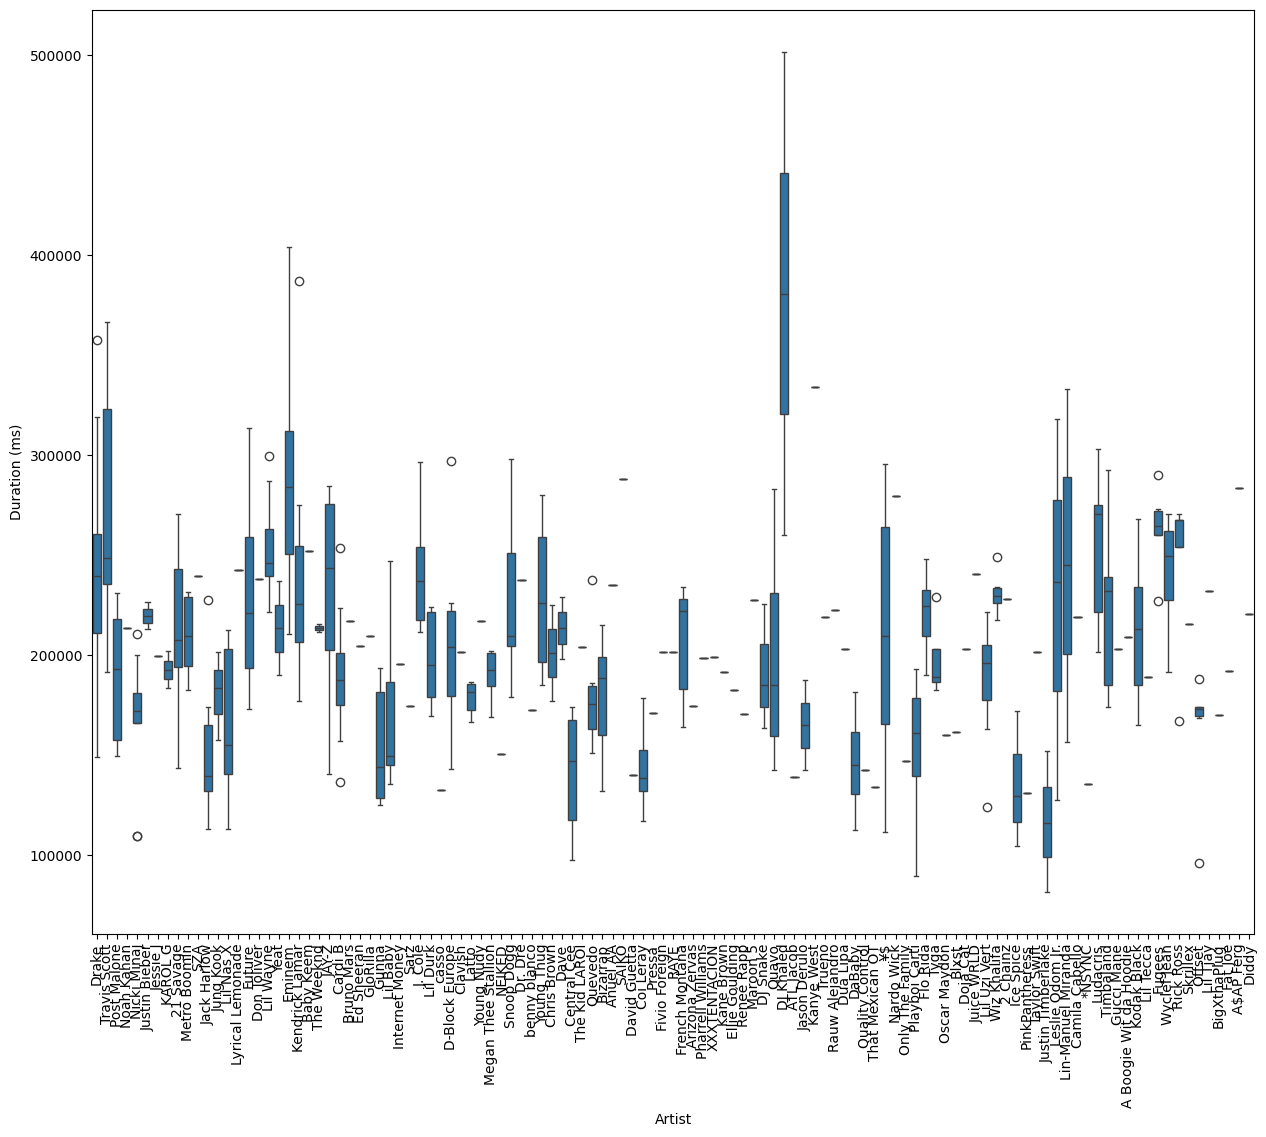

In [111]:
#Q.No.9> Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?
plt.figure(figsize=(15,12))
sns.boxplot(x='Artist',y='Duration (ms)',data=df4)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114],
 [Text(0, 0, 'Drake'),
  Text(1, 0, 'Travis Scott'),
  Text(2, 0, 'Post Malone'),
  Text(3, 0, 'Noah Kahan'),
  Text(4, 0, 'Nicki Minaj'),
  Text(5, 0, 'Justin Bieber'),
  Text(6, 0, 'Jessie J'),
  Text(7, 0, 'KAROL G'),
  Text(8, 0, '21 Savage'),
  Text(9, 0, 'Metro Boomin'),
  Text(10, 0, 'SZA'),
  Te

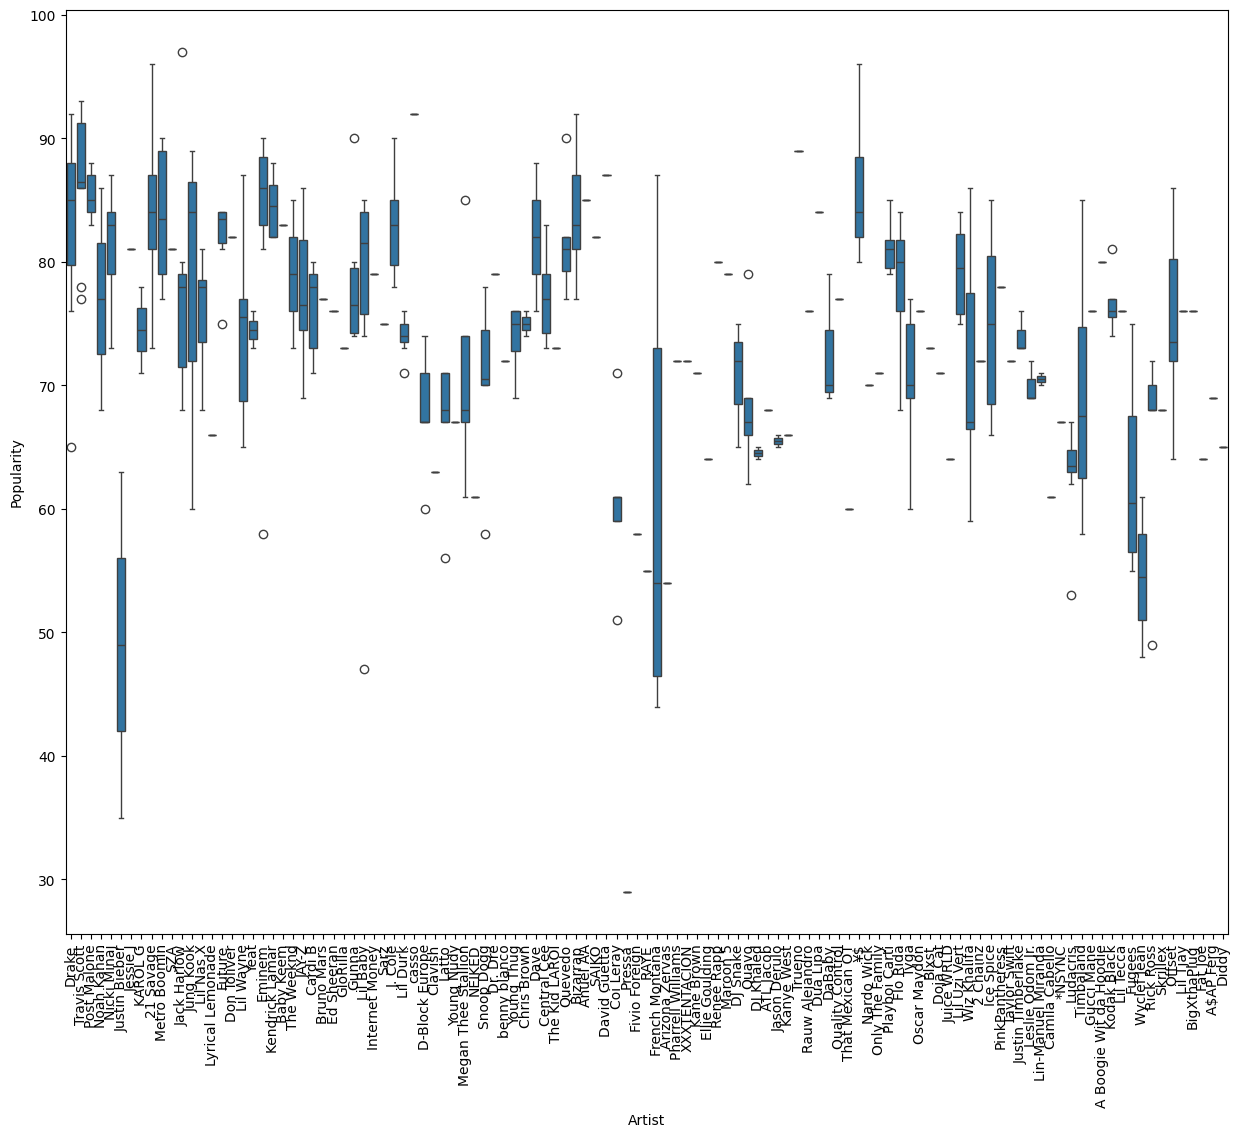

In [113]:
#Q.No.10> How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot?
plt.figure(figsize=(15,12))
sns.boxplot(x='Artist',y='Popularity',data=df4)
plt.xticks(rotation=90)